## **Regression Models:**
Regression models are statistical methods used to quantify the relationship between a dependent variable (often denoted as \( $ Y $ \)) and one or more independent variables (often denoted as \( $ X $ \)). These models can help predict the value of the dependent variable based on the values of the independent variables.

For instance, linear regression is a type of regression model where the relationship between the dependent and independent variables is linear. The general equation for a simple linear regression (with one independent variable) is:

$ Y = \beta_0 + \beta_1X + \epsilon $

where \( $ \beta_0 $ \) is the intercept, \( $ \beta_1 $ \) is the slope of the line, and \( $ \epsilon $ \) represents the error term.

## **Multicollinearity:**
Multicollinearity refers to a situation in multiple regression where two or more independent variables are highly correlated. When this occurs, it can be difficult (or impossible) to isolate the effect of a single independent variable on the dependent variable. It can cause:
1. Unstable coefficient estimates which can change significantly based on slight changes in the model.
2. Reduced statistical significance of predictors, even if they're meaningful.
3. Misleading interpretations of which variables are significant or relevant.

## **Detecting Multicollinearity:**
There are various methods to detect multicollinearity:

1. **Variance Inflation Factor (VIF):** This is a popular metric. A VIF value greater than 10 (a common threshold) suggests high multicollinearity.

$ \text{VIF} = \frac{1}{1 - R^2_j}  $

where \( $ R^2_j $ \) is the \( $ R^2 $ \) value obtained by regressing the j-th independent variable against all other independent variables.

2. **Correlation Matrices:** By examining the pairwise correlations between independent variables, one can identify pairs of variables that are highly correlated. A correlation value close to 1 or -1 indicates high multicollinearity.

3. **Condition Index:** It involves eigenvalues of the scaled (not centered) predictor variables. A condition index above 30 indicates multicollinearity issues.

4. **Eigenvalues and Eigenvectors:** When there's multicollinearity, several of the eigenvalues will be very small (close to zero).

## **Dealing with Multicollinearity:**
If multicollinearity is detected, here are potential remedies:
1. **Remove Variables:** One can remove one of the correlated variables.
2. **Combine Variables:** This can be done through techniques like Principal Component Analysis (PCA).
3. **Increase Sample Size:** Sometimes, increasing the sample size can help.
4. **Regularization Techniques:** Techniques like Ridge and Lasso regression can handle multicollinearity.

It's important to note that multicollinearity is a problem only when we want to understand the effect of individual predictors on the response. If the goal is just prediction, multicollinearity might not be a concern.

# Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from scipy.stats import linregress


rcParams['figure.figsize'] = 10, 9

# Prepare the Data

array([[<AxesSubplot: title={'center': 'vertices'}>,
        <AxesSubplot: title={'center': 'redexes'}>],
       [<AxesSubplot: title={'center': 'redex_depths'}>,
        <AxesSubplot: title={'center': 'heights'}>],
       [<AxesSubplot: title={'center': 'widths'}>,
        <AxesSubplot: title={'center': 'steps_time'}>]], dtype=object)

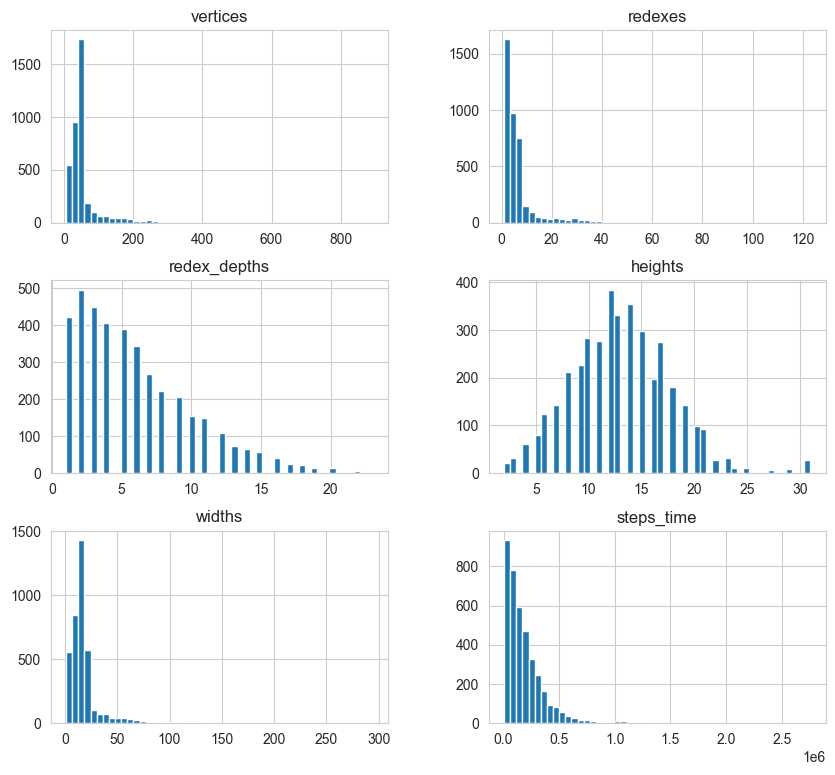

In [ ]:
data = pd.read_csv("../tests_16_regression/collected_data/prepared_data/prestep_data.csv")

data[["vertices", "redexes", "redex_depths", "heights", "widths", "steps_time"]].hist(bins=50);

array([[<AxesSubplot: title={'center': 'vertices'}>,
        <AxesSubplot: title={'center': 'redexes'}>],
       [<AxesSubplot: title={'center': 'heights'}>,
        <AxesSubplot: title={'center': 'widths'}>],
       [<AxesSubplot: title={'center': 'redex_depths'}>,
        <AxesSubplot: title={'center': 'steps_time'}>]], dtype=object)

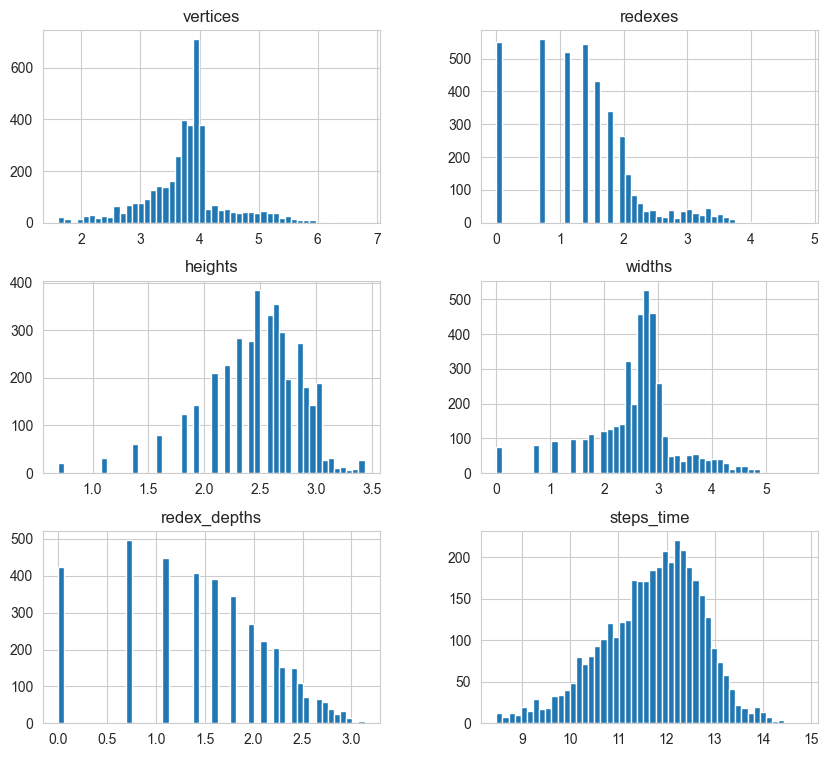

In [ ]:
data_norm = pd.DataFrame()

for col_name in ['vertices', 'redexes', 'heights', 'widths', 'redex_depths', 'steps_time']:
    norm_col_data = np.log(data[col_name])
    data_norm[col_name] = norm_col_data

data_norm.hist(bins=50);

In [ ]:
x_data = data[["vertices", "redexes", "redex_depths", "heights", "widths"]].to_numpy()
y_data = data[["steps_time"]].to_numpy()

x_norm_data = data_norm[["vertices", "redexes", "redex_depths", "heights", "widths"]].to_numpy()
y_norm_data = data_norm[["steps_time"]].to_numpy()

In [ ]:
y_norm_data

array([[11.78466107],
       [12.14034408],
       [10.37614391],
       ...,
       [11.45461816],
       [11.32256367],
       [10.65591728]])

# Test Linear Regression on Normalized Data

In [ ]:
for inx, param_name in enumerate(["vertices", "redexes", "redex_depths", "heights", "widths"]):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_norm_data[:, inx], y_norm_data.reshape(-1))

    # Print the results
    print(f"Parameter: normalized {param_name} ------------------------>>>>")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"Correlation coefficient (r): {r_value}")
    print(f"P-value: {p_value}")
    print(f"Standard error: {std_err}\n\n")

Parameter: normalized vertices ------------------------>>>>
Slope: 1.1125060353370877
Intercept: 7.506694597504955
Correlation coefficient (r): 0.7355337102204569
P-value: 0.0
Standard error: 0.01634784335734013


Parameter: normalized redexes ------------------------>>>>
Slope: 0.5932563373998172
Intercept: 10.874808326112245
Correlation coefficient (r): 0.48965213362238985
P-value: 3.4922120442037917e-236
Standard error: 0.016853468892731427


Parameter: normalized redex_depths ------------------------>>>>
Slope: 1.0404246174353176
Intercept: 10.131426149729077
Correlation coefficient (r): 0.7857770397765719
P-value: 0.0
Standard error: 0.013065225081110413


Parameter: normalized heights ------------------------>>>>
Slope: 1.707995137069371
Intercept: 7.441888958319337
Correlation coefficient (r): 0.6873221825964645
P-value: 0.0
Standard error: 0.02879604203347882


Parameter: normalized widths ------------------------>>>>
Slope: 0.978599817356524
Intercept: 9.15175123702852
Correla

# Multicollinearity Detection on Normalized Data

## 1. Correlation Matrix

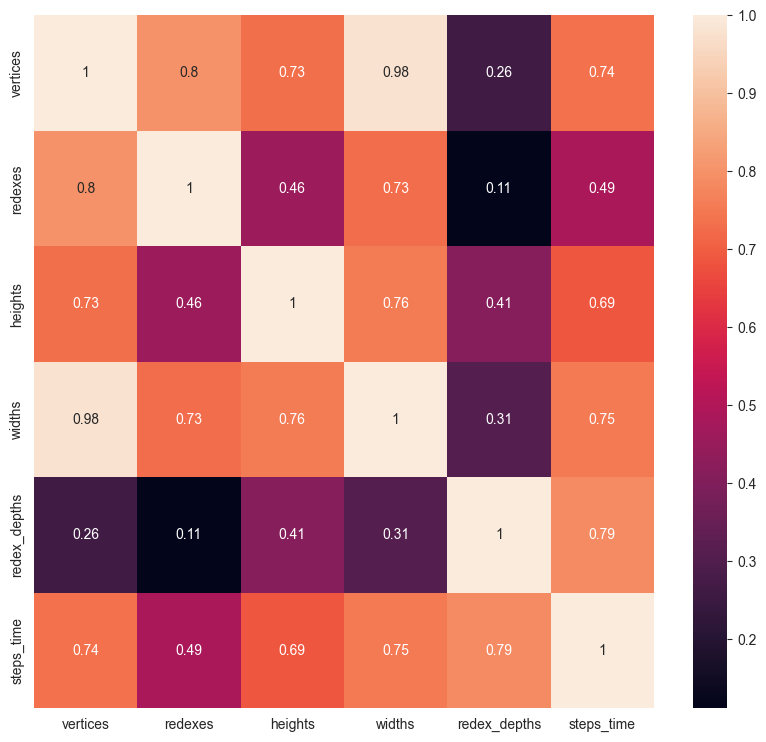

In [ ]:
corr_matrix = data_norm[["vertices", "redexes", "heights", "widths", "redex_depths", "steps_time"]].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

## 2. Variance Inflation Factor (VIF)
Don't pay attention on diag values, it must be INF or NaN.

In [ ]:
vif_matrix = corr_matrix.copy(deep=True)

for inx_x in range(6):
    for inx_y in range(6):
        if inx_x != inx_y:
            vif_matrix.iloc[inx_x, inx_y] = 1.0 / ((1.0 - (corr_matrix.iloc[inx_x, inx_y] ** 2)))
        else:
            vif_matrix.iloc[inx_x, inx_y] = np.nan

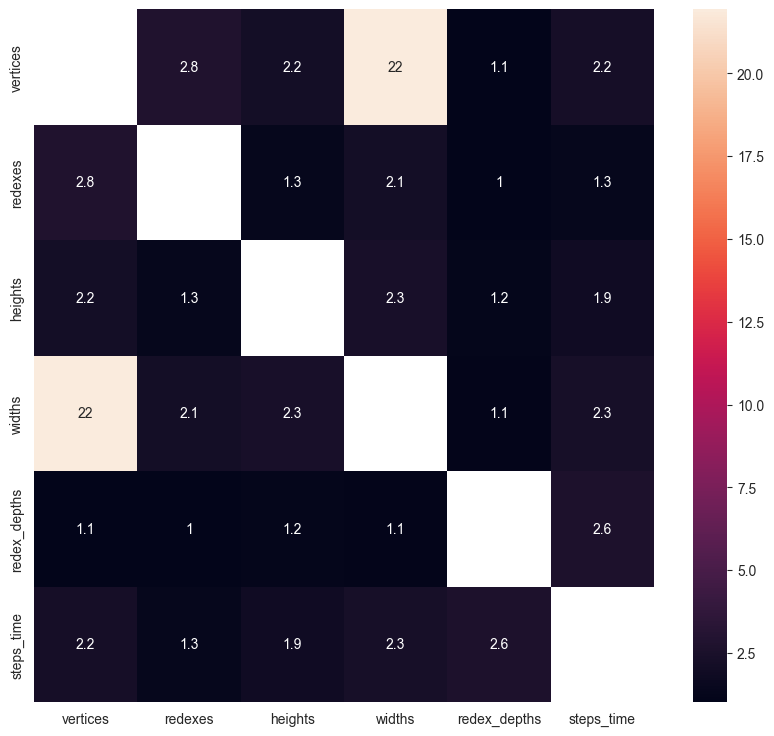

In [ ]:
sn.heatmap(vif_matrix, annot=True)
plt.show()

## 3. Eigenvalues and Eigenvectors

In [ ]:
np.set_printoptions(precision=3, suppress=True)

pca_ = PCA(n_components=5)
pca_.fit(x_norm_data,)

# Get eigenvectors (principal components)
eigenvectors = pca_.components_

# Get eigenvalues
eigenvalues = pca_.explained_variance_

print("Eigenvectors (Principal Components):")
print(eigenvectors)
print("\nEigenvalues:")
print(eigenvalues)
print("\nExplained variance ratio:")
print(pca_.explained_variance_ratio_)

Eigenvectors (Principal Components):
[[ 0.503  0.559  0.222  0.234  0.575]
 [ 0.074  0.34  -0.929 -0.123  0.012]
 [ 0.256 -0.729 -0.285  0.335  0.458]
 [-0.196  0.169 -0.078  0.904 -0.331]
 [ 0.798 -0.108  0.019 -0.021 -0.592]]

Eigenvalues:
[1.764 0.591 0.21  0.056 0.009]

Explained variance ratio:
[0.671 0.225 0.08  0.021 0.003]


In [ ]:
pca_ = PCA(n_components=5)
pca_.fit(x_norm_data, y_norm_data)

# Get eigenvectors (principal components)
eigenvectors = pca_.components_

# Get eigenvalues
eigenvalues = pca_.explained_variance_

print("Eigenvectors (Principal Components):")
print(eigenvectors)
print("\nEigenvalues:")
print(eigenvalues)
print("\nExplained variance ratio:")
print(pca_.explained_variance_ratio_)

Eigenvectors (Principal Components):
[[ 0.503  0.559  0.222  0.234  0.575]
 [ 0.074  0.34  -0.929 -0.123  0.012]
 [ 0.256 -0.729 -0.285  0.335  0.458]
 [-0.196  0.169 -0.078  0.904 -0.331]
 [ 0.798 -0.108  0.019 -0.021 -0.592]]

Eigenvalues:
[1.764 0.591 0.21  0.056 0.009]

Explained variance ratio:
[0.671 0.225 0.08  0.021 0.003]


## 4. Condition Index

In [ ]:
# Calculate Condition Index
condition_index = np.sqrt(max(eigenvalues) / min(eigenvalues))

print(f"Condition Index: {condition_index}")

Condition Index: 14.281804310279501


# Dealing with Multicollinearity

## 0. LinReg on Normalized Data with Multicollinearity

In [ ]:
def draw_pred_scatter(y_pred, y_real):
    plt.scatter(y_real, y_pred, s=3)
    plt.plot([8.5, 15], [8.5, 15], color='gray', linestyle='--')

    plt.xlabel("Real reduction time")
    plt.ylabel("Predicted time")
    plt.title("Pred vs Real Reduction time")
    plt.show()

RMSE: 0.2909358114889852
MAE: 0.22490263916457537


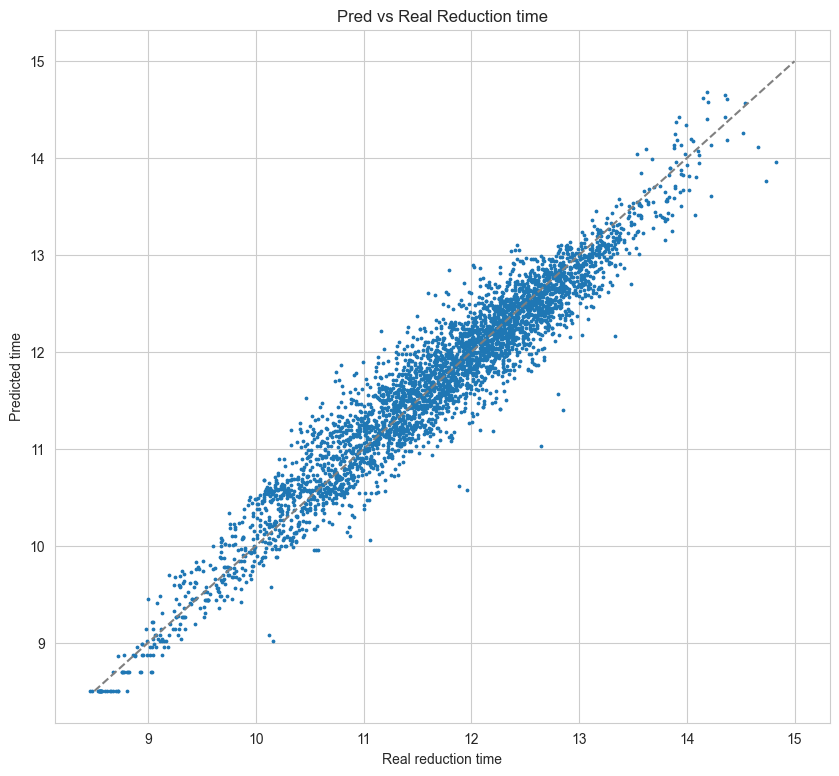

In [ ]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_norm_data, y_norm_data)

y_data_pred = lin_regressor.predict(x_norm_data)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

## 1.1. LinReg with Removing 'vertices'

RMSE: 0.3175459890895849
MAE: 0.24520446656735234


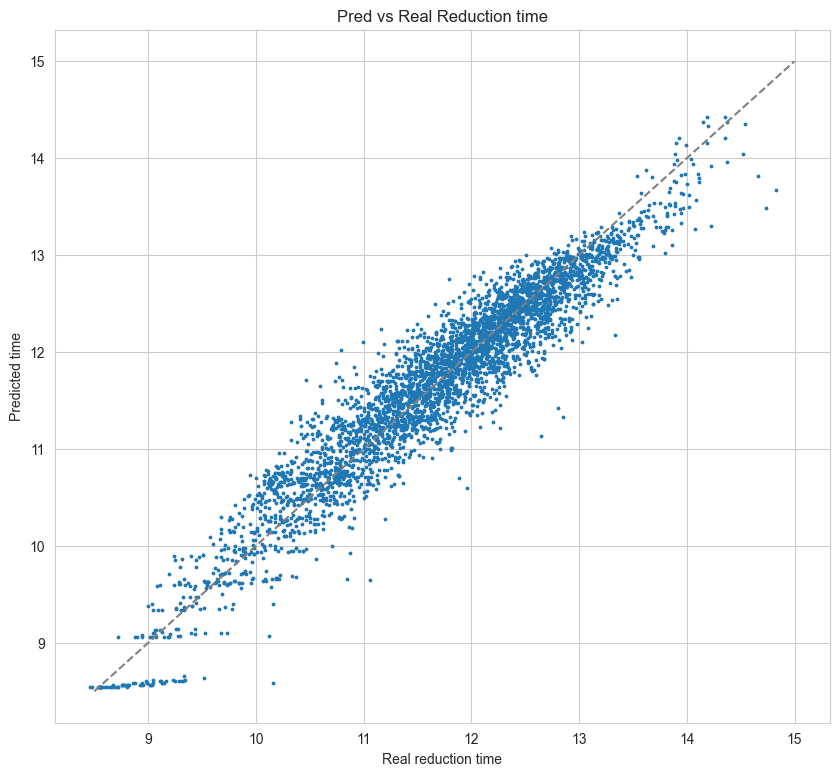

In [ ]:
x_norm_data_ = data_norm[['redexes', 'heights', 'widths', 'redex_depths']]

lin_regressor = LinearRegression()
lin_regressor.fit(x_norm_data_, y_norm_data)

y_data_pred = lin_regressor.predict(x_norm_data_)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

## 1.2. LinReg with Removing 'widths'

RMSE: 0.29128621064464283
MAE: 0.225067648830158


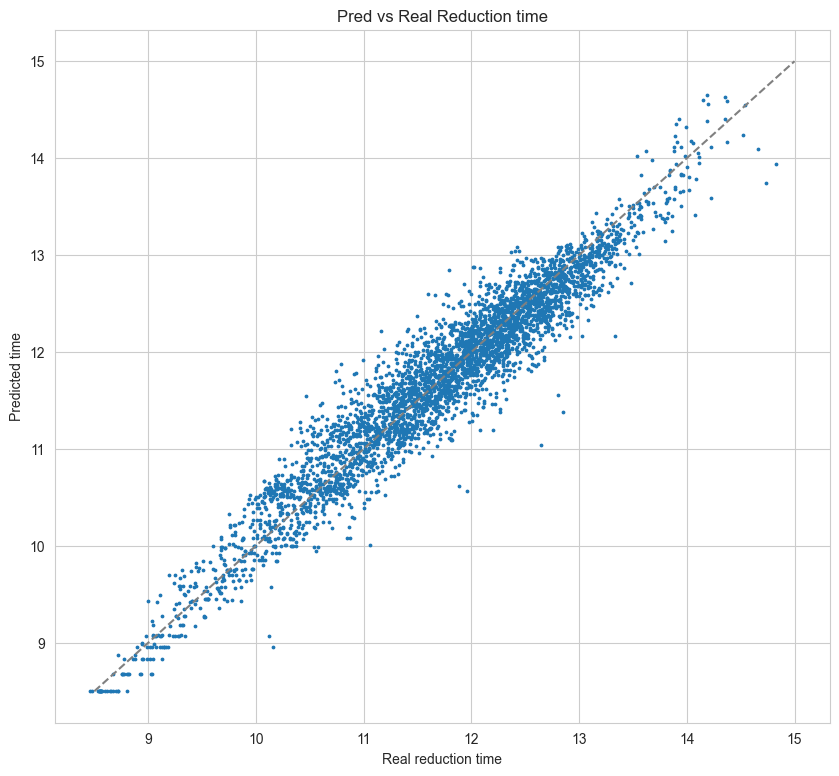

In [ ]:
x_norm_data_ = data_norm[['vertices', 'redexes', 'heights', 'redex_depths']]

lin_regressor = LinearRegression()
lin_regressor.fit(x_norm_data_, y_norm_data)

y_data_pred = lin_regressor.predict(x_norm_data_)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

## 2. Combining Variables with PCA

RMSE: 0.2909358114889852
MAE: 0.22490263916457537


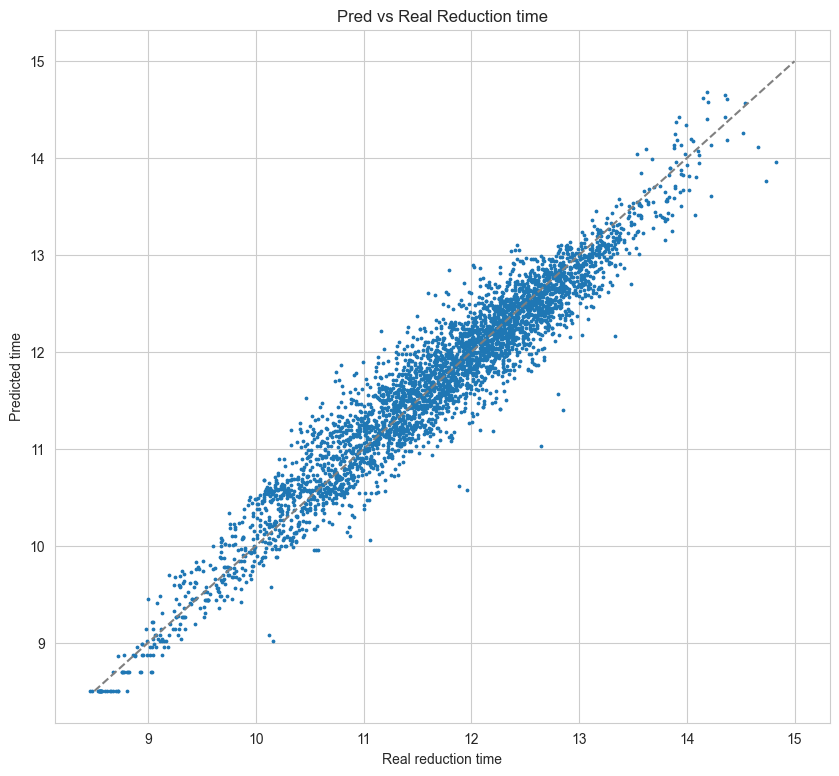

In [ ]:
pca_ = PCA(n_components=5)
x_norm_data_ = pca_.fit_transform(x_norm_data)

lin_regressor = LinearRegression()
lin_regressor.fit(x_norm_data_, y_norm_data)

y_data_pred = lin_regressor.predict(x_norm_data_)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

RMSE: 0.30446449728241487
MAE: 0.2348681481325386


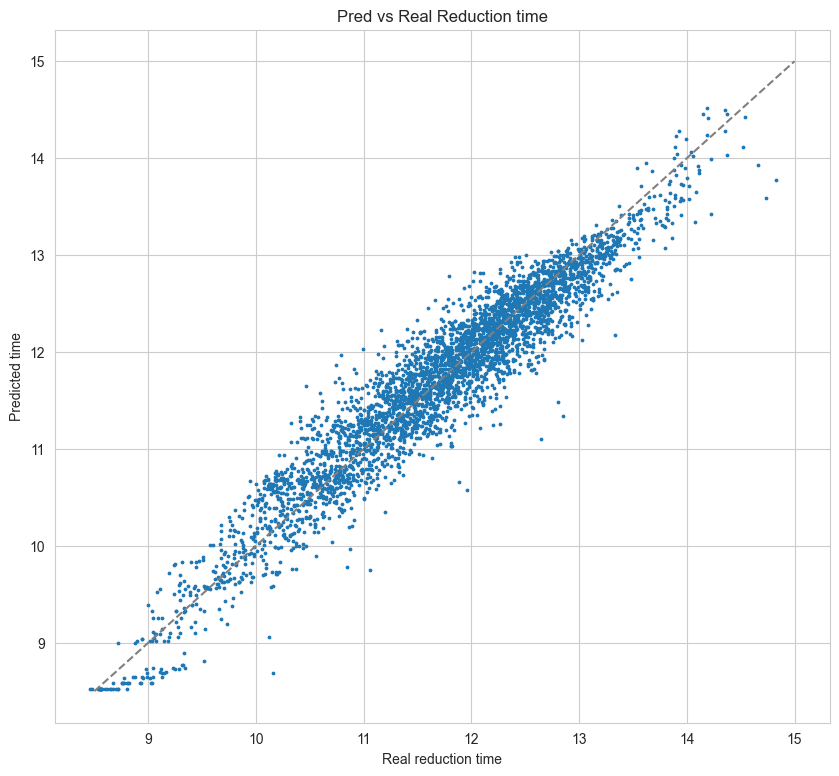

In [ ]:
pca_ = PCA(n_components=4)
x_norm_data_ = pca_.fit_transform(x_norm_data)

lin_regressor = LinearRegression()
lin_regressor.fit(x_norm_data_, y_norm_data)

y_data_pred = lin_regressor.predict(x_norm_data_)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

RMSE: 0.31118248139164023
MAE: 0.24099713730290412


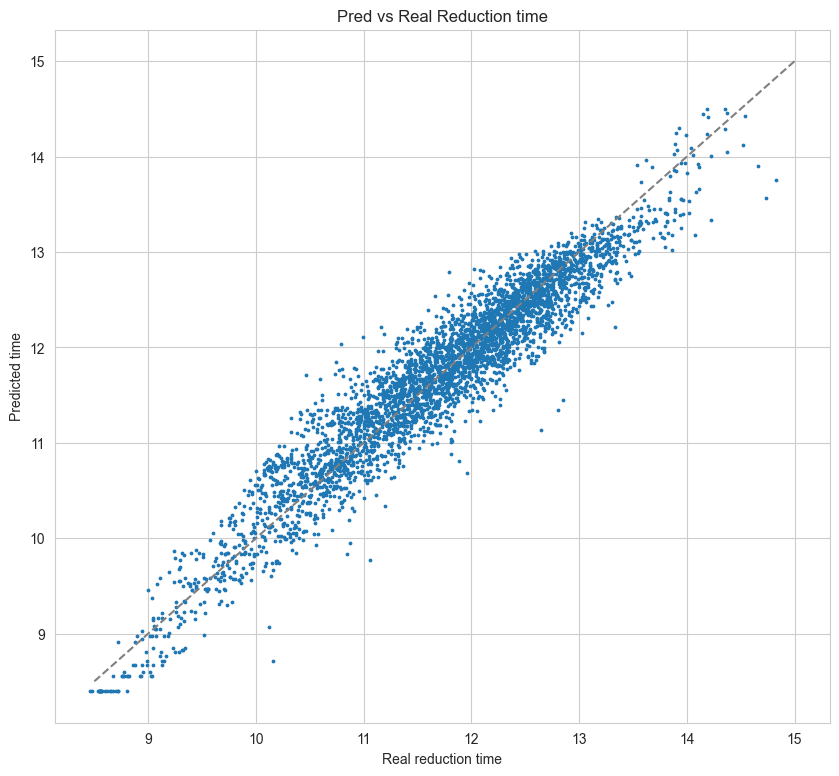

In [ ]:
pca_ = PCA(n_components=3)
x_norm_data_ = pca_.fit_transform(x_norm_data)

lin_regressor = LinearRegression()
lin_regressor.fit(x_norm_data_, y_norm_data)

y_data_pred = lin_regressor.predict(x_norm_data_)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

RMSE: 0.31440920217584956
MAE: 0.24345651598336393


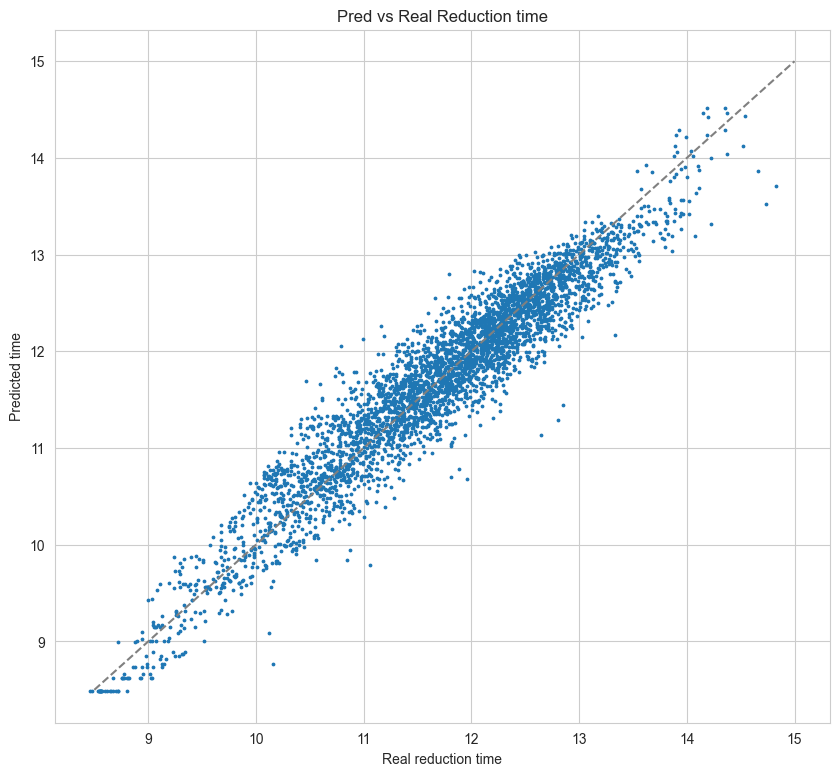

In [ ]:
pca_ = PCA(n_components=2)
x_norm_data_ = pca_.fit_transform(x_norm_data)

lin_regressor = LinearRegression()
lin_regressor.fit(x_norm_data_, y_norm_data)

y_data_pred = lin_regressor.predict(x_norm_data_)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

RMSE: 0.6483473214241612
MAE: 0.5176912092092403


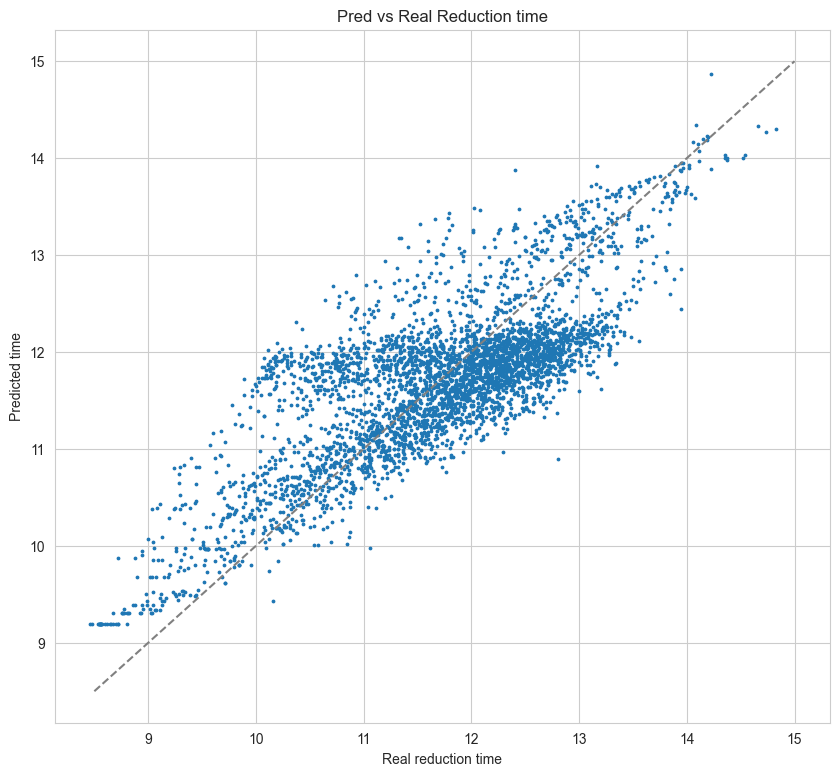

In [ ]:
pca_ = PCA(n_components=1)
x_norm_data_ = pca_.fit_transform(x_norm_data)

lin_regressor = LinearRegression()
lin_regressor.fit(x_norm_data_, y_norm_data)

y_data_pred = lin_regressor.predict(x_norm_data_)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

## 3.1. Regularization Techniques: 'Ridge' (LinReg + L2)

RMSE: 0.29093581150124587
MAE: 0.2249025975852185


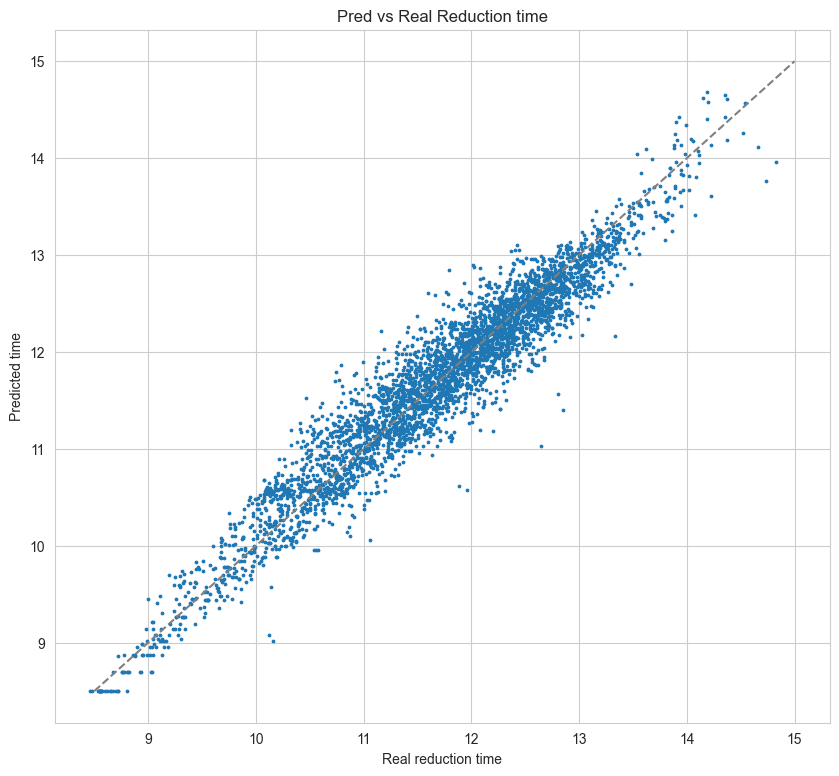

In [ ]:
ridge_regressor = Ridge(alpha=0.001)

ridge_regressor.fit(x_norm_data, y_norm_data)

y_data_pred = ridge_regressor.predict(x_norm_data)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

In [ ]:
ridge_regressor.coef_

array([[ 1.101, -0.132,  0.832, -0.001, -0.094]])

## 3.2. Regularization Techniques: 'Lasso' (LinReg + L1)

RMSE: 0.29132141796311484
MAE: 0.22497808101723465


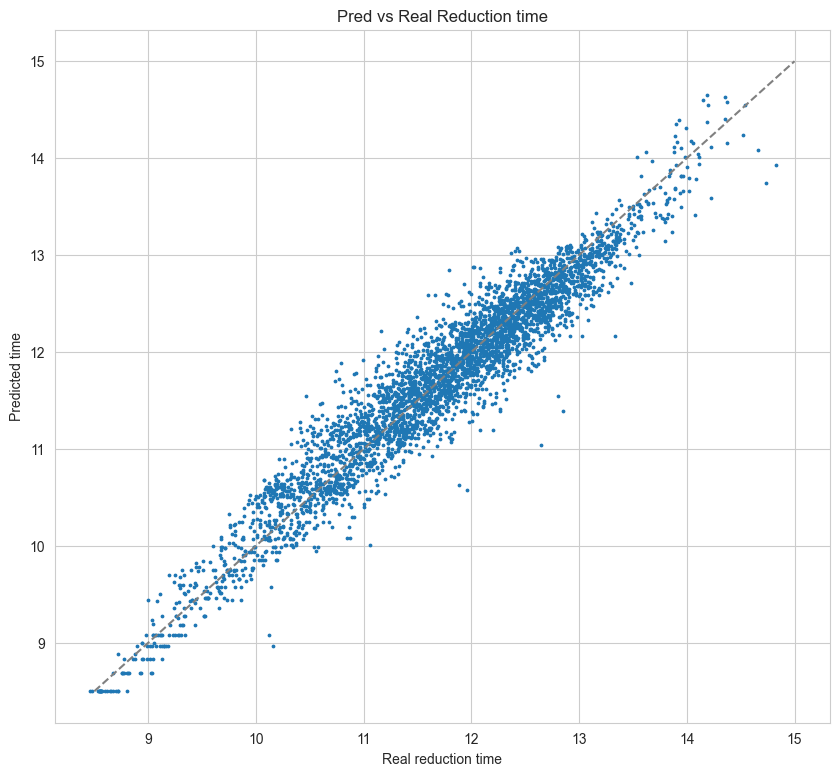

In [ ]:
lasso_regressor = Lasso(alpha=0.001)

lasso_regressor.fit(x_norm_data, y_norm_data)

y_data_pred = lasso_regressor.predict(x_norm_data)
rmse_ = mean_squared_error(y_norm_data, y_data_pred, squared=False)
mae_ = mean_absolute_error(y_norm_data, y_data_pred)
print("RMSE:", rmse_)
print("MAE:", mae_)

draw_pred_scatter(y_data_pred.reshape(-1), y_norm_data.reshape(-1))

In [ ]:
lasso_regressor.coef_

array([ 0.974, -0.113,  0.828,  0.   , -0.   ])

# Conclusions

**Detecting Multicollinearity in Linear Regression**

Multicollinearity is a common pitfall in linear regression models, which can reduce the model's interpretability and can lead to unstable coefficient estimates. While there are various methods available to detect multicollinearity, they each come with their own pros and cons.

### **Methods for Detection:**
1. **Correlation Matrix:**
    - This is a simple method to get a visual sense of multicollinearity among predictors.
    - However, it's important to note that this method doesn't provide strict measures for detecting multicollinearity.
    
2. **Variance Inflation Factor (VIF):**
    - Provides a quantified measure to detect multicollinearity.
    - A VIF value above a certain threshold (commonly 10) suggests a high multicollinearity.
    
3. **Eigenvalues (Explained Variance Ratio):**
    - Involves eigenvalues of the scaled (not centered) predictor variables.
    - A very small eigenvalue (close to zero) indicates multicollinearity issues.

4. **Condition Index:**
    - An index that can give insights into multicollinearity.
    - A condition index above 30 typically indicates multicollinearity issues.

### **Dealing with Multicollinearity:**

Once multicollinearity has been detected, there are several strategies that can be employed to address it:

1. **Regularization (Lasso Regression):**
    - This technique adds a penalty to the regression function that encourages simpler models.
    - Lasso regression can set some coefficients to zero, effectively selecting features and excluding collinear ones.
    
2. **Feature Removal:**
    - Sometimes, simply removing one of the collinear features doesn't negatively impact the model's performance and can simplify the model.

3. **Principal Component Analysis (PCA):**
    - A dimensionality reduction technique which can combine collinear variables.
    - While PCA can shrink the number of features and even provide an indicator for multicollinearity (like the explained variance ratio), one of its drawbacks is that the newly created variables (principal components) often lack clear interpretability compared to the original predictors.
